<a href="https://colab.research.google.com/github/Ansalnakhan/PROJECT/blob/main/ansalnaSOHandRUL07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2072]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2073]:
import pandas as pd

In [2074]:
data=pd.read_csv("/content/B0007.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [2075]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


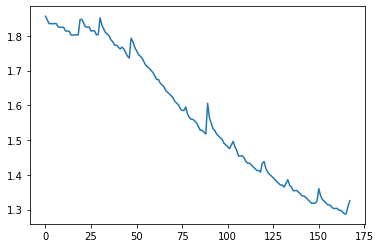

In [2076]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [2077]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [2078]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

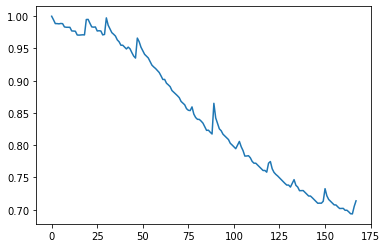

In [2079]:
plt.plot(range(len(soh)),soh)
plt.show()

In [2080]:
capacity=np.asarray(capacity)

In [2081]:
type(capacity)

numpy.ndarray

In [2082]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [2083]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [2084]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 5ms/step - loss: 0.4106
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0839
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0356
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 6.1888e-04
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 5.9541e-04


In [2085]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [2086]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [2087]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 3ms/step


0.00016294609784952898

In [2088]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.013


In [2089]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.0108792]
R2_score:  0.783494378210871


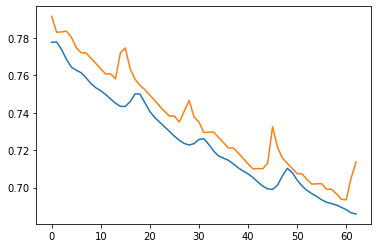

In [2090]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [2091]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [2092]:
preds

array([[0.94352597],
       [0.9423245 ],
       [0.94211125],
       [0.9417669 ],
       [0.9404488 ],
       [0.9385214 ],
       [0.93748575],
       [0.93674123],
       [0.9352972 ],
       [0.9332651 ],
       [0.93175477],
       [0.92999285],
       [0.92787653],
       [0.9269159 ],
       [0.9268138 ],
       [0.9288358 ],
       [0.93476725],
       [0.9426174 ],
       [0.9445914 ],
       [0.9419167 ],
       [0.9389213 ],
       [0.937237  ],
       [0.9355617 ],
       [0.93348557],
       [0.9320267 ],
       [0.9302863 ],
       [0.9303919 ],
       [0.9351039 ],
       [0.9406763 ],
       [0.938997  ],
       [0.9343898 ],
       [0.9302093 ],
       [0.9270236 ],
       [0.923731  ],
       [0.9199635 ],
       [0.9165526 ],
       [0.91378593],
       [0.91188663],
       [0.910223  ],
       [0.90922105],
       [0.9084951 ],
       [0.9060315 ],
       [0.9020705 ],
       [0.9009231 ],
       [0.9060115 ],
       [0.91405594],
       [0.91441053],
       [0.909

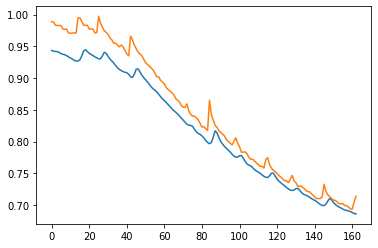

In [2093]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [2094]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [2095]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 2.1137
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2278
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1248
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1722
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0323
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0607
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 8/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0053


In [2096]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [2097]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 4ms/step


0.00034962888952520723

In [2098]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.019


In [2099]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01394671]
R2_score:  0.8652128463899689


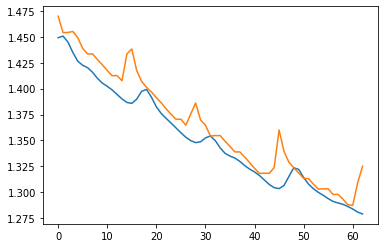

In [2100]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [2101]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [2102]:
preds

array([[1.7587172],
       [1.7557949],
       [1.7552538],
       [1.7548331],
       [1.7527374],
       [1.749243 ],
       [1.7468436],
       [1.745572 ],
       [1.7431923],
       [1.739513 ],
       [1.7364657],
       [1.7333864],
       [1.7295151],
       [1.7271467],
       [1.7267948],
       [1.7294197],
       [1.7391698],
       [1.7537032],
       [1.7602283],
       [1.7561972],
       [1.7501428],
       [1.7466384],
       [1.743694 ],
       [1.7399364],
       [1.7369462],
       [1.7339221],
       [1.7328812],
       [1.7401938],
       [1.7510557],
       [1.7511438],
       [1.7425588],
       [1.7343379],
       [1.7282213],
       [1.7222483],
       [1.7154261],
       [1.7088015],
       [1.7034569],
       [1.6996547],
       [1.6965128],
       [1.6943989],
       [1.6930977],
       [1.6893464],
       [1.6823192],
       [1.6783046],
       [1.6857842],
       [1.7005619],
       [1.7049693],
       [1.6971585],
       [1.6872568],
       [1.6794294],


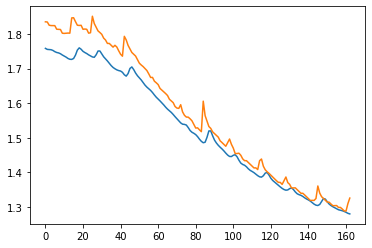

In [2103]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()